# Required assignment 3.1: Monte Carlo Simulations

The Monty Hall problem is a well-known probability puzzle inspired by the game show Let’s Make a Deal, hosted by Monty Hall.

In the game show, you’re presented with three doors. Behind one is a car; behind the other two, goats. You pick a door, hoping for the car. Monty, who knows what’s behind each door, opens one of the remaining two to reveal a goat. He then gives you a choice: stick with your original door or switch to the other unopened one.

What should you do? Stay or switch?

Let’s simulate this scenario in Python to find out.

In [1]:
#import necessary libraries

import numpy as np
import random
from random import randrange
from matplotlib import pyplot as plt

## The original Monty Hall game

### Step 1: Construct three 'imaginary' doors, one with a car behind and not known to the player

#### Question 1: Get the player's input about their choice of door

- Store the selected door in a variable called `picked_door`. 

- Remove the `picked_door` from the list of `doors`.


In [2]:
###GRADED
# Write the logic for picking one door and removing it

picked_door = None
winning_door = randrange(3)
random.seed(23) # Set the random number generator 
doors = [0,1,2]
### BEGIN SOLUTION 
picked_door = 1 
doors.remove(picked_door)
### END SOLUTION

print("You picked door", str(picked_door) + ".")

print("The remaining doors are therefore:", doors)

You picked door 1.
The remaining doors are therefore: [0, 2]


The `reveal_empty_door()` function simulates the game show host’s action in the Monty Hall problem by revealing a non-winning door. It ensures the host never opens the door hiding the prize, reflecting the host’s knowledge and intentional behaviour. This is essential for accurately modelling the decision-making dynamics and outcomes of the Monty Hall scenario.

In [4]:
def reveal_empty_door(doors, winning_door):
    """
    The host knows which door is winning, so opens one of the empty doors!
    """
    sample_from = [] #Host cannot open the door that is the winning door. So the host has 1 or 2 candidate doors.
    if len(doors) != 2:
        print("There is an issue!")
        return None
    else:
        if doors[0]!= winning_door:
            sample_from.append(doors[0])
        if doors[1]!= winning_door:
            sample_from.append(doors[1])
    return random.choice(sample_from)

The host reveals an empty door, removes it from the available choices and identifies the remaining unopened door, which is the contestant's alternative if they choose to switch. This step is central to the decision-making process in the Monty Hall problem.

In [5]:
open_door = reveal_empty_door(doors, winning_door)
print("The host reveals door", open_door)
doors.remove(open_door)
remaining_door = doors[0]

The host reveals door 0


The contestant is reminded of their initial choice and given the option to switch to the other unopened door, highlighting the critical decision point in the Monty Hall problem.

In [6]:
print("You initially picked door", picked_door, "but you can switch to door", remaining_door)

You initially picked door 1 but you can switch to door 2


The contestant chooses whether to switch doors or stay with the original selection. If `yes_no` is 'yes', the choice is updated to the other unopened door. Otherwise, the original choice is retained. A message is printed indicating the contestant's final selection.

In [7]:
yes_no = 'yes'  # Change to 'no' if you want to keep the original door

if yes_no == "yes":
    print("You switched to door", remaining_door)
    picked_door = remaining_door
else:
    print("You keep your door", picked_door)

You switched to door 2


In [8]:
print("Let's see if we won: (True means you are the winner!)")
print(picked_door == winning_door)

Let's see if we won: (True means you are the winner!)
True


### Step 2: Run the simulation function, which returns 1 for a win and 0 otherwise

The `simulate_round()` function runs a single Monty Hall game round. The contestant selects a door, the prize is randomly placed and the host reveals a non-winning door. Based on the contestant's decision to switch or stay (`yes_no`), the function returns 1 for a win and 0 for a loss.


In [9]:
def simulate_round(picked_door, yes_no):
    """
    Inputs: picked_door (0 1 or 2), decision of switching the door ("yes" or "no")
    Returns: whether or not we win the prize (1: win, 0: lose)
    """
    doors = [0,1,2]
    winning_door = randrange(3) # it can be 0, 1, or 2! We don't know the truth yet.
    doors.remove(picked_door)
    open_door = reveal_empty_door(doors, winning_door)
    doors.remove(open_door)
    remaining_door = doors[0]
    if yes_no == "yes":
        picked_door = remaining_door
    return int(picked_door == winning_door)

## Step 3: Simulate player's decisions

The Monty Hall game is simulated 30,000 times with the contestant always choosing door 1 and never switching. Each round's outcome is recorded, and the cumulative win ratio is calculated to show how the winning percentage evolves over time.



In [10]:
picked_door = 1 #fix a door (0,1, or 2)
yes_no = "no" #let's start with the strategy of keeping our door!
simulate = 30000 #number of times to simulate
results = np.zeros(simulate) #a lot of zeros
for i in range(simulate):
    results[i] = simulate_round(picked_door, yes_no)
ratios = np.cumsum(results) / (np.arange(1,simulate+ 1))

The plot displays the first 3,000 rounds of Monty Hall simulations where the contestant does not switch doors. The x-axis represents the number of rounds played, and the y-axis shows the cumulative win percentage. A dashed horizontal line at 1/3 indicates the theoretical probability of winning by staying with the initial choice.

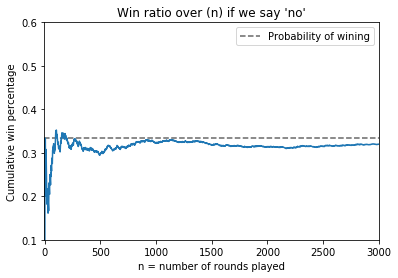

In [11]:
plot_limit = 3000 #plot how the ratio changes oby increasing $n$
x = np.arange(1, plot_limit + 1)
y = ratios[:plot_limit]
plt.title(r"Win ratio over (n) if we say 'no'")
plt.xlabel("n = number of rounds played")
plt.ylabel(r"Cumulative win percentage")
plt.axhline(y = 1/3, color = 'k', linestyle='--', alpha = 0.6, label = r"Probability of wining")
plt.plot(x,y)
plt.xlim(-5,plot_limit)
plt.ylim(0.1,0.6)
plt.legend()
plt.show()

The plot shows the observed win ratio gradually converging toward the expected value, with axis limits adjusted to highlight the 10 per cent to 60 per cent win rate range for clarity.

#### Question 2: Simulate the decisions for the following situation

If `picked_door` is 2 and the user chooses to switch (`yes_no` = 'yes'), run the simulation for 10,000 iterations.

In [12]:
### GRADED
picked_door = ...
yes_no = ...
simulate = ...

### YOUR SOLUTION HERE
### BEGIN SOLUTION
picked_door = 2
yes_no = 'yes'
simulate = 10000

results = np.zeros(simulate) #a lot of zeros
for i in range(simulate):
    results[i] = simulate_round(picked_door, yes_no)
ratios = np.cumsum(results) / (np.arange(1,simulate+ 1))
### END SOLUTION

The simulations for Question 2 are plotted below. 

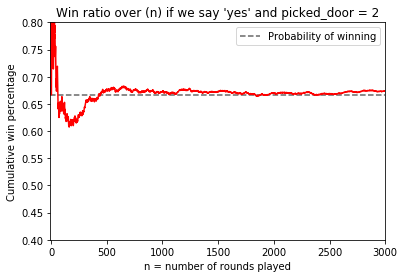

In [14]:
plot_limit = 3000 
x = np.arange(1, plot_limit + 1)
y = ratios[:plot_limit]
plt.title(r"Win ratio over (n) if we say 'yes' and picked_door = 2")
plt.xlabel("n = number of rounds played")
plt.ylabel(r"Cumulative win percentage")
plt.axhline(y = 2/3, color = 'k', linestyle='--', alpha = 0.6, label = r"Probability of winning")
plt.plot(x,y, color='r')
plt.xlim(-5,plot_limit)
plt.ylim(0.4,0.8)
plt.legend()
plt.show()

## Modification of the game

Each time the host offers you the option to switch doors, you flip a biased coin with probability $\theta$ of landing on 'H'. If it lands on 'H', you switch; otherwise, you stick with your original choice.

In [15]:
def simulate_with_coins(picked_door, theta):
    """
    Inputs: picked_door (0 1 or 2), decision of switching the door ("yes" or "no")
    Returns: whether or not we win the prize (1: win, 0: lose)
    """
    doors = [0,1,2]
    winning_door = randrange(3) # it can be 0, 1, or 2! We don't know the truth yet.
    doors.remove(picked_door)
    open_door = reveal_empty_door(doors, winning_door)
    doors.remove(open_door)
    remaining_door = doors[0]
    flip = np.random.uniform(0,1)

    if flip <= theta:
        picked_door = remaining_door
    else:
        picked_door = picked_door
    return int(picked_door == winning_door)

#### Question 3: Show the probability of winning using this strategy as a function of $\theta$.

If $\theta = 0.6$, write the logic for selecting a door using the `simulate_with_coins` function, and compute the value of ratios.

Hint: Follow the same approach as in Question 2, using `picked_door = 1` and `simulate = 30,000`.

In [16]:
###GRADED

picked_door = ...
theta = ...
simulate = ...
###YOUR SOLUTION HERE

### BEGIN SOLUTION
picked_door = 1 #fix a door (0,1, or 2)
theta = 0.6
simulate = 30000 #number of times to simulate
results = np.zeros(simulate) #a lot of zeros
for i in range(simulate):
    results[i] = simulate_with_coins(picked_door, theta)
ratios = np.cumsum(results) / (np.arange(1,simulate+ 1))
### END SOLUTION

print("We win with a", ratios[-1], "fraction of the time!")

We win with a 0.5317333333333333 fraction of the time!


Imagine this:

- You’re playing a modified version of the Monty Hall game.

- You start with £5. Each round costs £1 to play.

- If you pick the winning door, you earn £2 (recovering your £1 and gaining a £1 profit). If you lose, you forfeit the £1.

- Your strategy: switch doors based on a coin flip. If a random number between 0 and 1 is less than or equal to $\theta$, you switch; otherwise, you stick with your original choice.

In [18]:
def reveal_empty_door(doors, winning_door):
    options = []
    for k in doors:
        if k != winning_door:
            options.append(k)
    return random.choice(options)

def simulate_round(picked_door, theta):
    """
    Inputs: picked_door (0 1 or 2), decision of switching the door ("yes" or "no")
    Returns: whether or not we win the prize (1: win, 0: lose)
    """
    doors = [0,1,2]
    winning_door = random.randrange(3) # it can be 0, 1, or 2! We don't know the truth yet.
    doors.remove(picked_door)
    open_door = reveal_empty_door(doors, winning_door)
    doors.remove(open_door)
    remaining_door = doors[0]
    flip = np.random.uniform(0,1)
    if flip <= theta:
        picked_door = remaining_door

    return int(picked_door == winning_door)

def simulate_with_coins(picked_door, theta):
    """
    Inputs: picked_door (0 1 or 2), decision of switching the door ("yes" or "no")
    Returns: whether or not we win the prize (1: win, 0: lose)
    """
    doors = [0,1,2]
    winning_door = random.randrange(3) # it can be 0, 1, or 2! We don't know the truth yet.
    doors.remove(picked_door)
    open_door = reveal_empty_door(doors, winning_door)
    doors.remove(open_door)
    remaining_door = doors[0]
    flip = np.random.uniform(0,1)

    if flip <= theta:
        picked_door = remaining_door

    return int(picked_door == winning_door)

def survival_probability(theta, num_rounds, num_simulations):
    """
    Simulates the Monty Hall game and estimates the probability of survival.

    Args:
        theta (float): Probability threshold for switching doors.
        num_rounds (int): Number of rounds to simulate.
        num_simulations (int): Number of simulation runs.

    Returns:
        float: Estimated probability of survival.
    """
    survival_count = 0
    for _ in range(num_simulations):
        money = 5
        for _ in range(num_rounds):
            money -= 1  # Pay to play
            if money <= 0:
                break
            picked_door = random.randint(0, 2)
            if simulate_with_coins(picked_door, theta):
                money += 2  # Win £2 (profit of £1)
        if money > 0:
            survival_count += 1

    survival_probability =  survival_count / num_simulations
    print(f"Estimated survival probability: {survival_probability:.4f}")
    return survival_probability


#### Question 4: Estimate the `survival_probability` when `theta = 0.4`, `num_rounds = 10` and `num_simulations = 10000`

In [19]:
###GRADED

theta = ...
num_rounds = ...
num_simulations = ...

### YOUR SOLUTION HERE

### BEGIN SOLUTION
theta = 0.4
num_rounds = 10
num_simulations = 10000
survival_probability(theta, num_rounds, num_simulations)
### END SOLUTION

Estimated survival probability: 0.7668


0.7668